In [1]:
import pandas as pd
from sklearn import datasets
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
sns.set_style("darkgrid",{"font.sans-serif":['simhei','Droid Sans Fallback']})


import numpy as np
import numpy.random as random

# Read CSV

In [2]:
shop_reviews = pd.read_csv("./data/shop_reviews.csv")
shop_reviews[:2]

,id,author.id,author.name,review.date,n.resp,n.view,n.useful,n.lolipop,review.url,r.delicious,r.service,r.atom,r.nImgs,r.favorite,r.postTags,r.articleTags
0,1073358,deliaandtzu,生活就是要慢慢吃,2017/08/07,4,511,14,0,/comment/1461485,好,很滿意,很好,29,花醬豬排歐姆|招牌鮮奶茶|花醬豬排歐姆蛋吐司,早餐|早午餐|漢堡|美崙街美食|捷運美食|士林捷運站美食|吐司|蛋餅,NaN
1,1073358,ipeen142861,寶寶750,2017/01/16,1,4,35,4,/comment/1279826,非常好,很滿意,很好,32,烙烤雞腿起司堡|招牌鮮奶茶,早午餐|漢堡|美崙街美食|捷運美食|士林捷運站美食,NaN


In [3]:
shop_infos = pd.read_csv("./data/shop_infos.csv")
shop_infos.head()

,title,id,addr,cate.major,cate.minor,avg.cost,url
0,早吧Morning Bar,1073358,台北市士林區美崙街32號,早餐,西式早餐,99,http://www.ipeen.com.tw/shop/1073358-早吧Morning...
1,阜杭豆漿店,27702,台北市中正區忠孝東路一段108號2樓,早餐,中式早餐,79,http://www.ipeen.com.tw/shop/27702-阜杭豆漿店
2,好初早餐,107143,新北市板橋區文化路二段125巷70號,早餐,其他類型早餐,135,http://www.ipeen.com.tw/shop/107143-好初早餐
3,豐盛號,613262,台北市士林區中正路223巷4號1樓,早餐,早午餐,113,http://www.ipeen.com.tw/shop/613262-豐盛號
4,陳根找茶,49644,台北市信義區莊敬路391巷7號,早餐,西式早餐,104,http://www.ipeen.com.tw/shop/49644-陳根找茶


In [4]:
shop_details = pd.read_csv("./data/shop_details.csv")
shop_details.head()

,id,n.scoring,scoring.mix,scoring.delicious,scoring.service,scoring.atom,n.view,n.favorite,n.share,shop.summary
0,1073358,28,45,15,15,14,4742395,46,24.0,堅持手工食材製作，做給家人吃的美味心意！鄰近捷運士林站的【早吧Morning...
1,27702,380,45,17,12,11,1490390,2608,236.0,阜杭豆漿店是一個有中式早餐、豆漿、燒餅的中式早餐，網友認為值得推薦的有：厚餅...
2,107143,167,45,16,15,14,451240,1279,116.0,好初早餐是一個有好初早餐、板橋、早餐的其他類型早餐，網友認為值得推薦的有：鹹...
3,613262,136,45,15,14,12,408921,1177,80.0,【媒體推薦--台北十大必吃早餐】\rhttp://www.fongsheng...
4,49644,133,45,15,13,11,304096,1432,71.0,陳根找茶是一個有陳根找茶、早餐、法國吐司的西式早餐，網友認為值得推薦的有：法...


In [5]:
shop_all = shop_details.join(shop_infos,lsuffix='_caller', rsuffix='_other')
shop_all.describe()

,id_caller,n.scoring,scoring.mix,scoring.delicious,scoring.service,scoring.atom,n.view,n.favorite,n.share,id_other,avg.cost
count,2.400000e+03,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2.400000e+03,2400.000000,2146.000000,2.400000e+03,2400.000000
mean,8.115881e+05,6.437500,36.968750,13.573750,12.637917,11.390417,4.462719e+05,31.296667,4.686859,8.115881e+05,85.264167
std,3.560352e+05,14.291181,14.151309,5.976435,5.837609,5.739633,2.137069e+06,114.153281,10.582467,3.560352e+05,87.860007
min,8.782000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,2.740000e+02,0.000000,1.000000,8.782000e+03,0.000000
25%,6.063280e+05,1.000000,40.000000,12.000000,10.000000,10.000000,4.063750e+03,1.000000,1.000000,6.063280e+05,30.000000
50%,9.802140e+05,2.000000,40.000000,15.000000,15.000000,13.000000,7.542000e+03,4.000000,1.000000,9.802140e+05,60.000000
75%,1.052278e+06,5.000000,45.000000,18.000000,16.000000,15.000000,1.628450e+04,16.000000,3.000000,1.052278e+06,110.000000
max,1.248009e+06,380.000000,50.000000,20.000000,20.000000,20.000000,2.151994e+07,2608.000000,236.000000,1.248009e+06,750.000000


# Do rows filtering

In [6]:
df2 = shop_all[shop_all['cate.minor'] != '情境主題餐廳']

# 進行匯總運算 groupy {欲匯總的欄位} 

In [7]:
maxdf = df2.groupby(['cate.minor'], as_index=False)['avg.cost'].max()
#             .groupby('cluster')['time'].mean())
maxdf

,cate.minor,avg.cost
0,中式早餐,382
1,其他類型早餐,450
2,早午餐,655
3,複合式,210
4,西式早餐,750


In [8]:
# 取第1列到第5列
df2[1:5]

,id_caller,n.scoring,scoring.mix,scoring.delicious,scoring.service,scoring.atom,n.view,n.favorite,n.share,shop.summary,title,id_other,addr,cate.major,cate.minor,avg.cost,url
1,27702,380,45,17,12,11,1490390,2608,236.0,阜杭豆漿店是一個有中式早餐、豆漿、燒餅的中式早餐，網友認為值得推薦的有：厚餅...,阜杭豆漿店,27702,台北市中正區忠孝東路一段108號2樓,早餐,中式早餐,79,http://www.ipeen.com.tw/shop/27702-阜杭豆漿店
2,107143,167,45,16,15,14,451240,1279,116.0,好初早餐是一個有好初早餐、板橋、早餐的其他類型早餐，網友認為值得推薦的有：鹹...,好初早餐,107143,新北市板橋區文化路二段125巷70號,早餐,其他類型早餐,135,http://www.ipeen.com.tw/shop/107143-好初早餐
3,613262,136,45,15,14,12,408921,1177,80.0,【媒體推薦--台北十大必吃早餐】\rhttp://www.fongsheng...,豐盛號,613262,台北市士林區中正路223巷4號1樓,早餐,早午餐,113,http://www.ipeen.com.tw/shop/613262-豐盛號
4,49644,133,45,15,13,11,304096,1432,71.0,陳根找茶是一個有陳根找茶、早餐、法國吐司的西式早餐，網友認為值得推薦的有：法...,陳根找茶,49644,台北市信義區莊敬路391巷7號,早餐,西式早餐,104,http://www.ipeen.com.tw/shop/49644-陳根找茶


In [9]:
# let's do sort with value , you can assign index that to be sorted by !!!
df2.sort_values(['n.scoring'],ascending=[False])

,id_caller,n.scoring,scoring.mix,scoring.delicious,scoring.service,scoring.atom,n.view,n.favorite,n.share,shop.summary,title,id_other,addr,cate.major,cate.minor,avg.cost,url
1,27702,380,45,17,12,11,1490390,2608,236.0,阜杭豆漿店是一個有中式早餐、豆漿、燒餅的中式早餐，網友認為值得推薦的有：厚餅...,阜杭豆漿店,27702,台北市中正區忠孝東路一段108號2樓,早餐,中式早餐,79,http://www.ipeen.com.tw/shop/27702-阜杭豆漿店
2,107143,167,45,16,15,14,451240,1279,116.0,好初早餐是一個有好初早餐、板橋、早餐的其他類型早餐，網友認為值得推薦的有：鹹...,好初早餐,107143,新北市板橋區文化路二段125巷70號,早餐,其他類型早餐,135,http://www.ipeen.com.tw/shop/107143-好初早餐
3,613262,136,45,15,14,12,408921,1177,80.0,【媒體推薦--台北十大必吃早餐】\rhttp://www.fongsheng...,豐盛號,613262,台北市士林區中正路223巷4號1樓,早餐,早午餐,113,http://www.ipeen.com.tw/shop/613262-豐盛號
4,49644,133,45,15,13,11,304096,1432,71.0,陳根找茶是一個有陳根找茶、早餐、法國吐司的西式早餐，網友認為值得推薦的有：法...,陳根找茶,49644,台北市信義區莊敬路391巷7號,早餐,西式早餐,104,http://www.ipeen.com.tw/shop/49644-陳根找茶
5,783672,90,45,15,14,15,164763,1322,51.0,好初早餐Deli (二號店)是一個有好初早餐、早午餐、板橋的西式早餐，網友認...,好初早餐Deli(二號店),783672,新北市板橋區建國街118號,早餐,西式早餐,152,http://www.ipeen.com.tw/shop/783672-好初早餐Deli-二號店
6,632396,86,45,16,15,17,4655119,379,67.0,Butter巴特。用堅持食材的理念與心中夢想完美氛圍.打造巴特早午餐.......,Butter巴特早午餐,632396,彰化縣彰化市旭光路343號,早餐,其他類型早餐,129,http://www.ipeen.com.tw/shop/632396-Butter巴特早午餐
1200,1013648,75,45,16,16,17,12633356,464,60.0,Butter 巴特2店 Brunch&cafe是一個有巴特2店、早午餐、Br...,Butter 巴特2店 Brunch&cafe,1013648,台中市西區五權西四街13巷10號,早餐,早午餐,248,http://www.ipeen.com.tw/shop/1013648-Butter-巴特...
1760,1013648,75,45,16,16,17,12634309,464,60.0,Butter 巴特2店 Brunch&cafe是一個有巴特2店、早午餐、Br...,Butter 巴特2店 Brunch&cafe,1013648,台中市西區五權西四街13巷10號,早餐,早午餐,248,http://www.ipeen.com.tw/shop/1013648-Butter-巴特...
1648,1013648,75,45,16,16,17,12633356,464,60.0,Butter 巴特2店 Brunch&cafe是一個有巴特2店、早午餐、Br...,Butter 巴特2店 Brunch&cafe,1013648,台中市西區五權西四街13巷10號,早餐,早午餐,248,http://www.ipeen.com.tw/shop/1013648-Butter-巴特...
1616,1013648,75,45,16,16,17,12633356,464,60.0,Butter 巴特2店 Brunch&cafe是一個有巴特2店、早午餐、Br...,Butter 巴特2店 Brunch&cafe,1013648,台中市西區五權西四街13巷10號,早餐,早午餐,248,http://www.ipeen.com.tw/shop/1013648-Butter-巴特...


# 可以直接對裡頭的原始資料進行加值運算

In [10]:
import numpy as np
df2.apply(np.sum, axis=0)

id_caller                                                   1947073177
n.scoring                                                        15437
scoring.mix                                                      88685
scoring.delicious                                                32564
scoring.service                                                  30318
scoring.atom                                                     27321
n.view                                                      1071009439
n.favorite                                                       75035
n.share                                                          10050
shop.summary                 堅持手工食材製作，做給家人吃的美味心意！鄰近捷運士林站的【早吧Morning...
title                早吧Morning Bar阜杭豆漿店好初早餐豐盛號陳根找茶好初早餐Deli(二號店)Butt...
id_other                                                    1947073177
addr                 台北市士林區美崙街32號台北市中正區忠孝東路一段108號2樓新北市板橋區文化路二段125巷7...
cate.major           早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐早餐...
cate.m

In [11]:
df2[['n.scoring','scoring.mix']].apply(np.sum,axis=0)

n.scoring      15437
scoring.mix    88685
dtype: int64

In [12]:
# sum with n.scoring and scoring.mix
df2[:20][['n.scoring','scoring.mix']].apply(np.sum,axis=1)

0      73
1     425
2     212
3     181
4     178
5     135
6     131
7     114
8     120
9     113
10    112
11    111
12     99
13    103
14    116
15    101
16     84
17    102
18     92
19     97
dtype: int64

# 清除重複的資料

In [13]:
# 計算 id_caller 有重複的
cdf = shop_all.groupby(['id_caller']).count()['n.scoring']
cdf[cdf>1]

id_caller
589360      2
595860      2
597672      2
597848      2
602472      2
610066      2
617126      2
631570      2
632262      2
681222      2
958596      2
1002752     2
1007852     2
1013648    18
1026468     2
1029524     2
1040620     2
1040622     2
1045288    11
1051132    12
1063668     8
1068710     2
1072098     2
1073358    12
1077420    12
1111121    12
1136966    13
1138883    13
1164746    14
1210649    14
1217522    11
1248009    10
Name: n.scoring, dtype: int64

In [14]:
# 看起來蠻多資料 id 一樣但是只有 n.view 是不一樣，推測是不同天所抓取 view 值 
shop_all.loc[shop_all['id_caller'].isin(list(cdf[cdf>1].index))].sort_values(['id_caller'],ascending=[False])

,id_caller,n.scoring,scoring.mix,scoring.delicious,scoring.service,scoring.atom,n.view,n.favorite,n.share,shop.summary,title,id_other,addr,cate.major,cate.minor,avg.cost,url
320,1248009,1,0,0,0,0,6547,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店
2000,1248009,1,0,0,0,0,6553,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店
2144,1248009,1,0,0,0,0,6553,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店
1120,1248009,1,0,0,0,0,6547,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店
1136,1248009,1,0,0,0,0,6547,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店
1904,1248009,1,0,0,0,0,6553,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店
528,1248009,1,0,0,0,0,6547,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店
2256,1248009,1,0,0,0,0,6553,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店
144,1248009,1,0,0,0,0,6547,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店
448,1248009,1,0,0,0,0,6547,1,NaN,我們分享各地吃過的美食與飲料，加入我們的創意來製作初初看特色三明治、漢堡、甜...,初初看碳烤吐司專賣店,1248009,台北市松山區民權東路三段160巷19弄1號,早餐,早午餐,0,http://www.ipeen.com.tw/shop/1248009-初初看碳烤吐司專賣店


In [15]:
# 更快速的方法且只看 id_caller
shop_all.drop_duplicates(subset='id_caller')

,id_caller,n.scoring,scoring.mix,scoring.delicious,scoring.service,scoring.atom,n.view,n.favorite,n.share,shop.summary,title,id_other,addr,cate.major,cate.minor,avg.cost,url
0,1073358,28,45,15,15,14,4742395,46,24.0,堅持手工食材製作，做給家人吃的美味心意！鄰近捷運士林站的【早吧Morning...,早吧Morning Bar,1073358,台北市士林區美崙街32號,早餐,西式早餐,99,http://www.ipeen.com.tw/shop/1073358-早吧Morning...
1,27702,380,45,17,12,11,1490390,2608,236.0,阜杭豆漿店是一個有中式早餐、豆漿、燒餅的中式早餐，網友認為值得推薦的有：厚餅...,阜杭豆漿店,27702,台北市中正區忠孝東路一段108號2樓,早餐,中式早餐,79,http://www.ipeen.com.tw/shop/27702-阜杭豆漿店
2,107143,167,45,16,15,14,451240,1279,116.0,好初早餐是一個有好初早餐、板橋、早餐的其他類型早餐，網友認為值得推薦的有：鹹...,好初早餐,107143,新北市板橋區文化路二段125巷70號,早餐,其他類型早餐,135,http://www.ipeen.com.tw/shop/107143-好初早餐
3,613262,136,45,15,14,12,408921,1177,80.0,【媒體推薦--台北十大必吃早餐】\rhttp://www.fongsheng...,豐盛號,613262,台北市士林區中正路223巷4號1樓,早餐,早午餐,113,http://www.ipeen.com.tw/shop/613262-豐盛號
4,49644,133,45,15,13,11,304096,1432,71.0,陳根找茶是一個有陳根找茶、早餐、法國吐司的西式早餐，網友認為值得推薦的有：法...,陳根找茶,49644,台北市信義區莊敬路391巷7號,早餐,西式早餐,104,http://www.ipeen.com.tw/shop/49644-陳根找茶
5,783672,90,45,15,14,15,164763,1322,51.0,好初早餐Deli (二號店)是一個有好初早餐、早午餐、板橋的西式早餐，網友認...,好初早餐Deli(二號店),783672,新北市板橋區建國街118號,早餐,西式早餐,152,http://www.ipeen.com.tw/shop/783672-好初早餐Deli-二號店
6,632396,86,45,16,15,17,4655119,379,67.0,Butter巴特。用堅持食材的理念與心中夢想完美氛圍.打造巴特早午餐.......,Butter巴特早午餐,632396,彰化縣彰化市旭光路343號,早餐,其他類型早餐,129,http://www.ipeen.com.tw/shop/632396-Butter巴特早午餐
7,1031302,69,45,18,17,15,156632,913,48.0,熱樂煎爆漿乳酪三明治 (高雄店)是一個有古巴三明治、台南、高雄三民美食的西式...,熱樂煎爆漿乳酪三明治(高雄店),1031302,高雄市三民區博愛一路330號,早餐,西式早餐,134,http://www.ipeen.com.tw/shop/1031302-熱樂煎爆漿乳酪三明...
8,1013648,75,45,16,16,17,12633275,464,60.0,Butter 巴特2店 Brunch&cafe是一個有巴特2店、早午餐、Br...,Butter 巴特2店 Brunch&cafe,1013648,台中市西區五權西四街13巷10號,早餐,早午餐,248,http://www.ipeen.com.tw/shop/1013648-Butter-巴特...
9,921008,68,45,16,12,9,187342,643,51.0,丘比手作土司早午餐 Cube Brunch是一個有華山市場美食、早午餐、大分...,丘比手作土司早午餐 Cube Brunch,921008,台北市中正區忠孝東路一段108號2樓,早餐,西式早餐,134,http://www.ipeen.com.tw/shop/921008-丘比手作土司早午餐-...


# Filter Zeor Value Row

In [16]:
shop_all = shop_all[shop_all['avg.cost']!=0]

In [17]:
shop_all = shop_all.drop_duplicates(subset='id_caller')

# 各類型的餐廳有多少間

In [18]:
cate_dist = shop_all.groupby(['cate.minor'], as_index=False)['id_caller'].count()


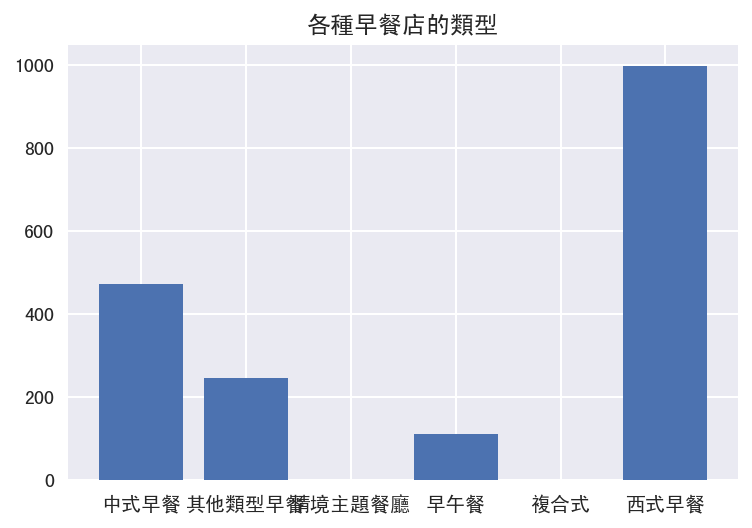

In [19]:
fig, ax = plt.subplots()
rects1 = ax.bar(cate_dist['cate.minor'], cate_dist['id_caller'])
ax.set_title("各種早餐店的類型")
plt.show()

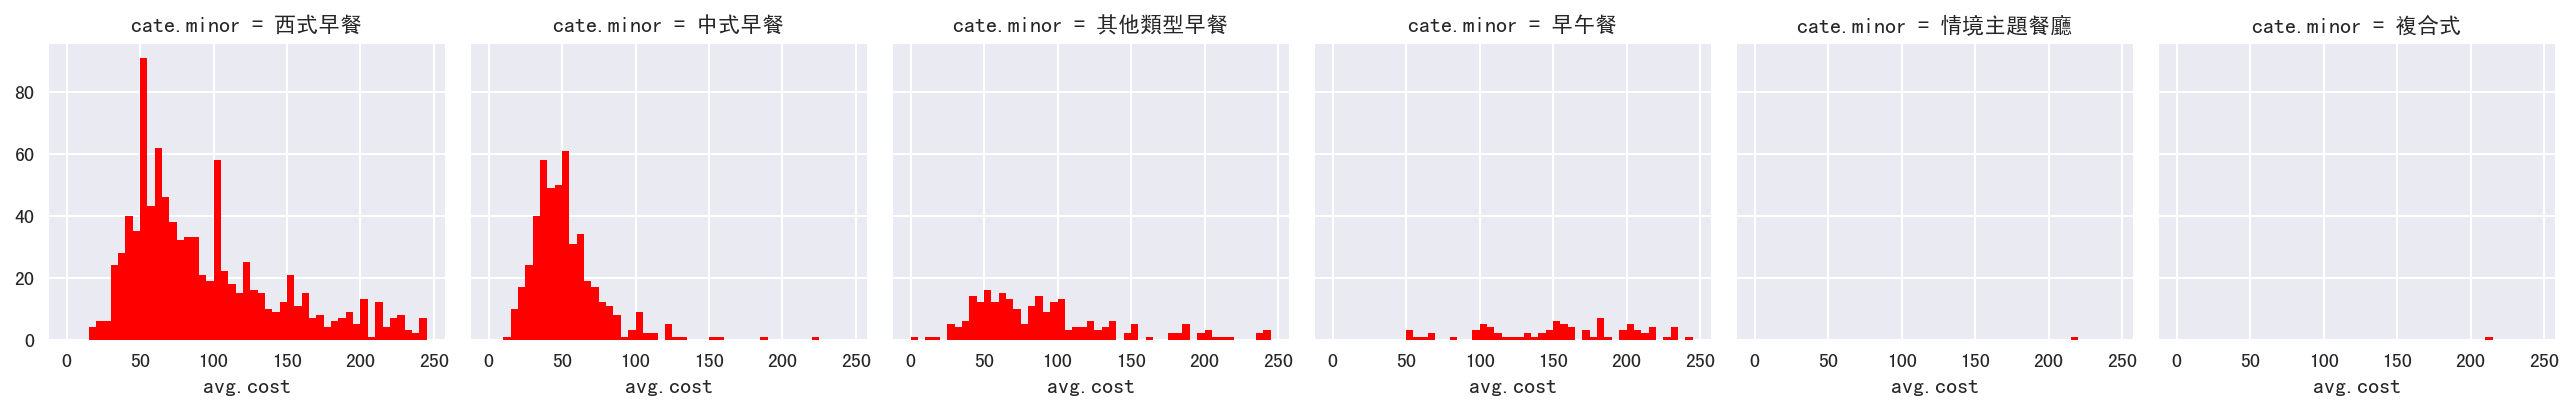

In [20]:
import numpy as np
import seaborn as sns

from pylab import mpl
bins = np.arange(0, 250, 5)
g = sns.FacetGrid(shop_all, col="cate.minor" )
g = g.map(plt.hist, "avg.cost", bins=bins, color="r")

# 各類型的餐廳的消費金額分佈

In [21]:
cate_avg = shop_all[['cate.minor','avg.cost']].groupby(['cate.minor']).mean()

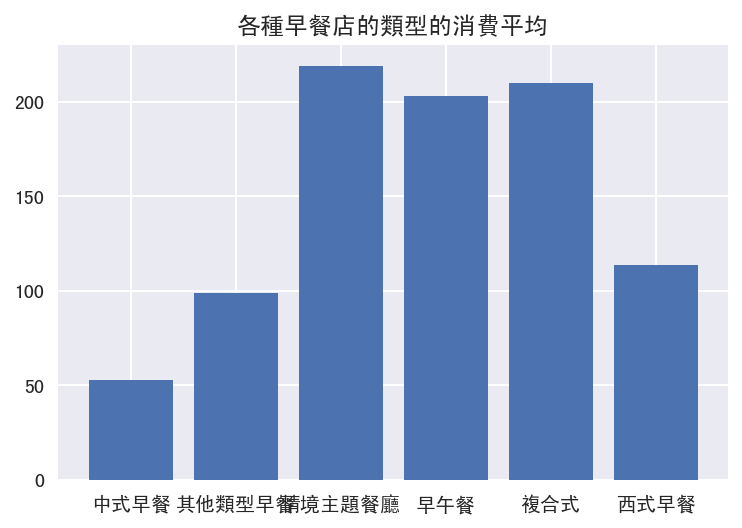

In [22]:
fig, ax = plt.subplots()
rects1 = ax.bar(cate_avg.index, cate_avg['avg.cost'])
ax.set_title("各種早餐店的類型的消費平均")
plt.show()

# 客單價超過 100 的比例

In [23]:
shop_100 = shop_all[shop_all['avg.cost']>100]

In [24]:
cate_dist

,cate.minor,id_caller
0,中式早餐,473
1,其他類型早餐,246
2,情境主題餐廳,1
3,早午餐,112
4,複合式,1
5,西式早餐,999


In [25]:
shop_100_dist = shop_100.groupby('cate.minor').count()['id_caller']

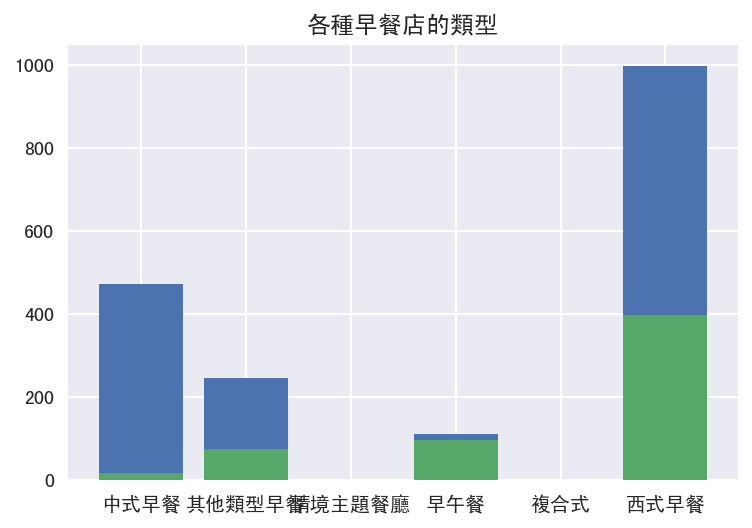

In [26]:
fig, ax = plt.subplots()
rects1 = ax.bar(cate_dist['cate.minor'], cate_dist['id_caller'])

rects1 = ax.bar(shop_100_dist.index, shop_100_dist.values)

ax.set_title("各種早餐店的類型")
plt.show()

# 看一下價格的 Histgram chart

(array([  0.,   5.,   5.,  40.,  42.,  67.,  88.,  80.,  56.,  53.,  29.,
         36.,  29.,  48.,  34.,  34.,  21.,  30.,  11.,  32.,  18.,  15.,
         15.,  11.,  15.,  13.,  17.,  13.,   9.,  10.,  10.,  11.,  13.,
          5.,   4.,   8.,   9.,   5.,   6.,   7.,   6.,   3.,   2.,   3.,
          1.,   1.,   2.,   4.,   2.,   1.,   6.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   1.        ,    8.56565657,   16.13131313,   23.6969697 ,
          31.26262626,   38.82828283,   46.39393939,   53.95959596,
          61.52525253,   69.09090909,   76.65656566,   84.22222222,
          91.78787879,   99.35353535,  106.91919192,  114.48484848,
         122.05050505,  129.61616162,  137.18181818,  144.74

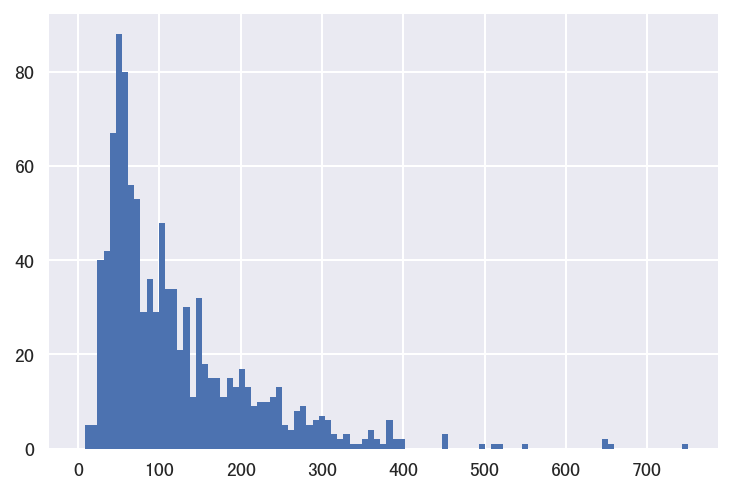

In [27]:
bins = np.linspace(shop_all['avg.cost'].min(),shop_all['avg.cost'].max(), 100)
plt.hist(shop_all['avg.cost'][:1000],bins=bins)

In [28]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


# 畫出價格可能出現的機率(就是 Density Function 啦!!)

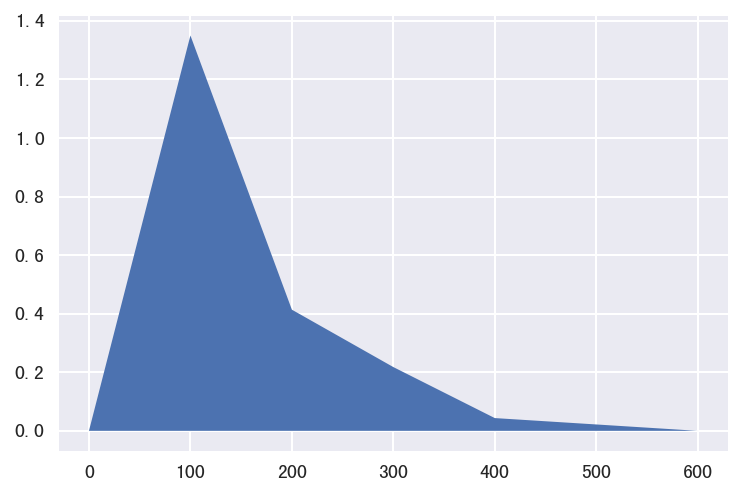

In [59]:
X = shop_all['avg.cost'].values
X = X.reshape([X.shape[0],1])
kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X)
Y = np.array(range(0,700,100))
Y = Y.reshape([Y.shape[0],1])
log_dens = kde.score_samples(Y)
log_dens = np.exp(log_dens)
fig, ax = plt.subplots()
ax.fill(Y,log_dens)

In [53]:
cm  = shop_all['cate.minor']
set(cm.values)

{'中式早餐', '其他類型早餐', '情境主題餐廳', '早午餐', '複合式', '西式早餐'}

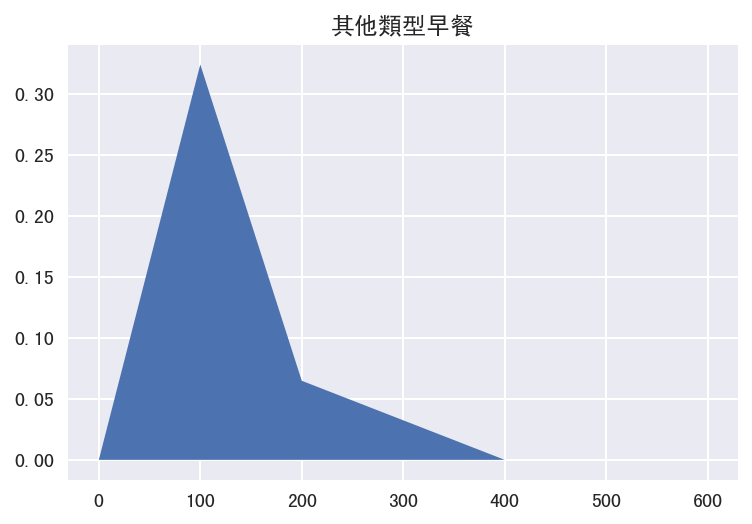

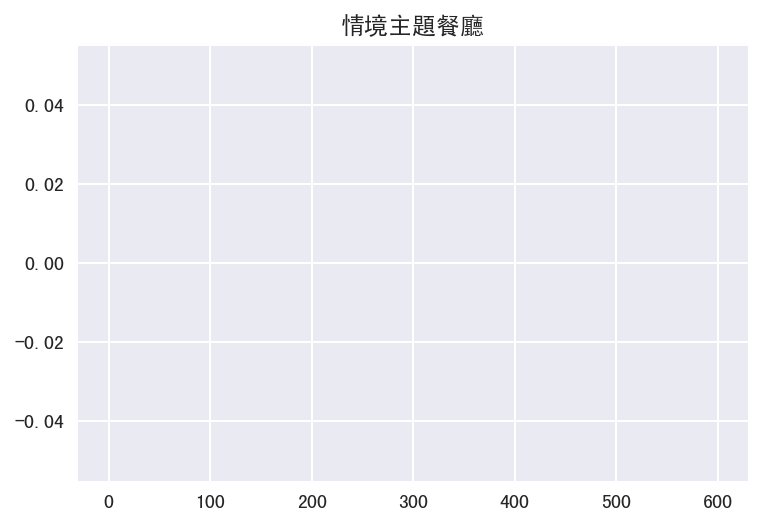

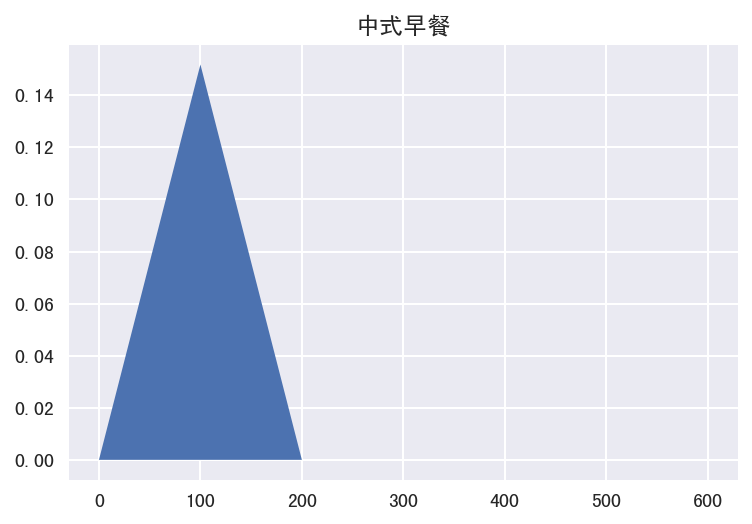

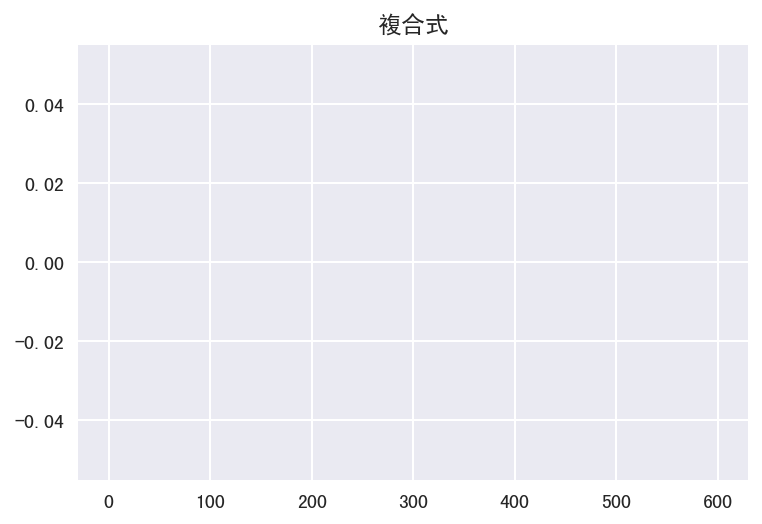

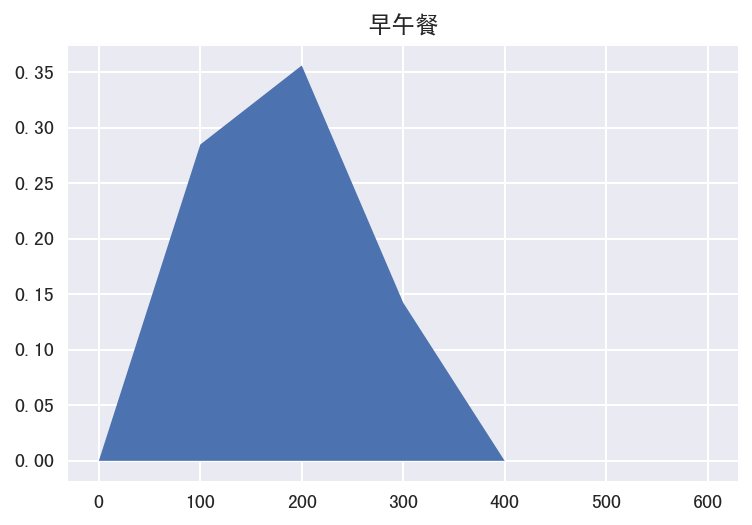

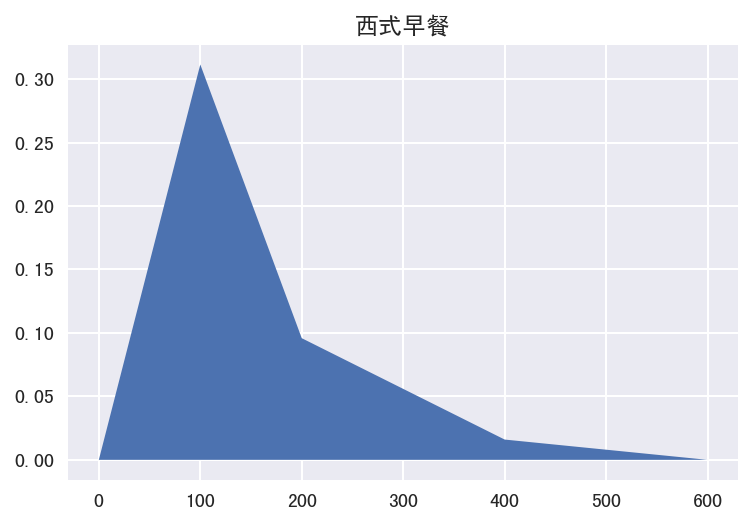

In [60]:
# 
for c in set(cm.values):
    shop_all_cate = shop_all[shop_all['cate.minor']==c]

    X = shop_all_cate['avg.cost'].values
    X = X.reshape([X.shape[0],1])
    kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
    Y = np.array(range(0,700,100))
    Y = Y.reshape([Y.shape[0],1])
    log_dens = kde.score_samples(Y)
    log_dens = np.exp(log_dens)
    fig, ax = plt.subplots()
    ax.fill(Y,log_dens)
    ax.set_title(c)

# 個子類別的平均客單價之中位數


In [32]:
shop_all.groupby('cate.minor')['avg.cost'].median()

cate.minor
中式早餐       48.0
其他類型早餐     82.5
情境主題餐廳    219.0
早午餐       180.0
複合式       210.0
西式早餐       85.0
Name: avg.cost, dtype: float64

# View 與 Favorite 之間的關系
* 我們探討一下這三個值之間的關係
* n.view	n.favorite	n.share	

In [33]:
views = shop_all['n.view']
favorites = shop_all['n.favorite']
shares = shop_all['n.share']


Text(0.5,1,'shares vs favorites')

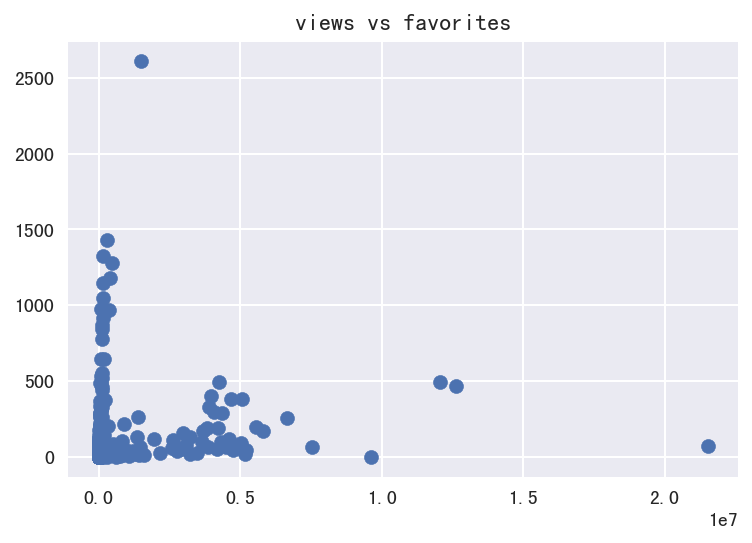

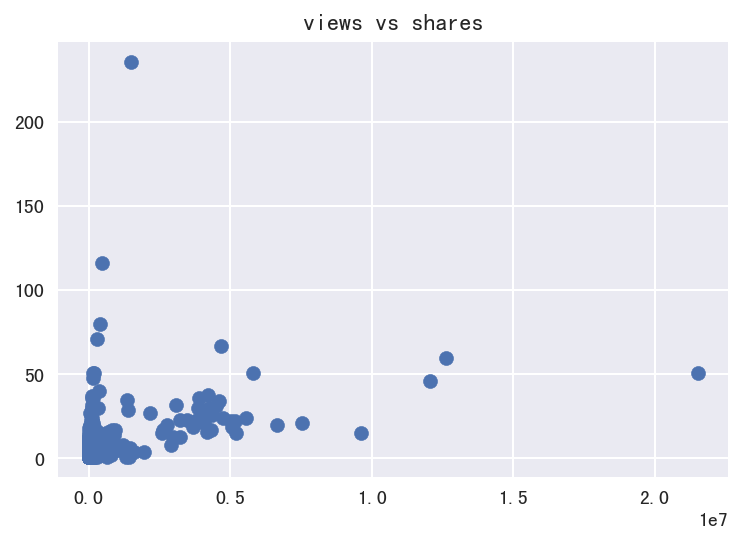

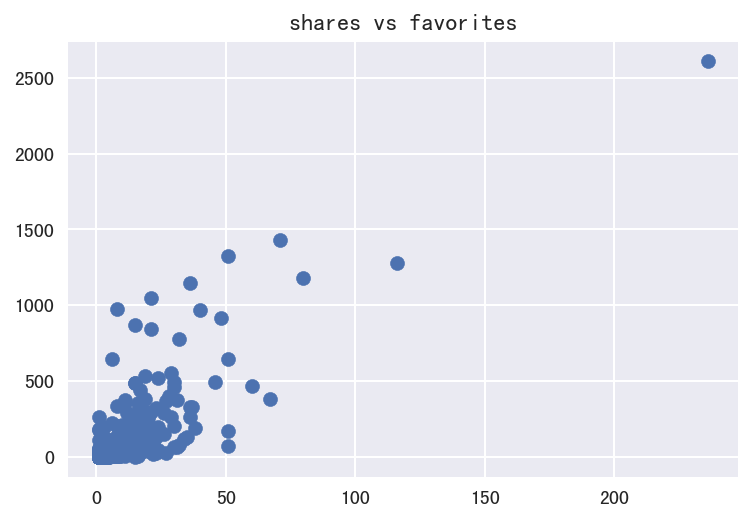

In [50]:
# f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
# f.set_figwidth(20)
# f.set_figheight(5)

fig, ax = plt.subplots()
_,ax.scatter(views,favorites)
ax.set_title("views vs favorites")

fig, ax = plt.subplots()
_,ax.scatter(views,shares)
ax.set_title("views vs shares")

fig, ax = plt.subplots()
_,ax.scatter(shares,favorites)
ax.set_title("shares vs favorites")

## 看來 share 跟收藏數有比較高的關係

# 使用一下 Linear Regression 來看一下

In [125]:
shop_all.head()

,id_caller,n.scoring,scoring.mix,scoring.delicious,scoring.service,scoring.atom,n.view,n.favorite,n.share,shop.summary,title,id_other,addr,cate.major,cate.minor,avg.cost,url
0,1073358,28,45,15,15,14,4742395,46,24.0,堅持手工食材製作，做給家人吃的美味心意！鄰近捷運士林站的【早吧Morning...,早吧Morning Bar,1073358,台北市士林區美崙街32號,早餐,西式早餐,99,http://www.ipeen.com.tw/shop/1073358-早吧Morning...
1,27702,380,45,17,12,11,1490390,2608,236.0,阜杭豆漿店是一個有中式早餐、豆漿、燒餅的中式早餐，網友認為值得推薦的有：厚餅...,阜杭豆漿店,27702,台北市中正區忠孝東路一段108號2樓,早餐,中式早餐,79,http://www.ipeen.com.tw/shop/27702-阜杭豆漿店
2,107143,167,45,16,15,14,451240,1279,116.0,好初早餐是一個有好初早餐、板橋、早餐的其他類型早餐，網友認為值得推薦的有：鹹...,好初早餐,107143,新北市板橋區文化路二段125巷70號,早餐,其他類型早餐,135,http://www.ipeen.com.tw/shop/107143-好初早餐
3,613262,136,45,15,14,12,408921,1177,80.0,【媒體推薦--台北十大必吃早餐】\rhttp://www.fongsheng...,豐盛號,613262,台北市士林區中正路223巷4號1樓,早餐,早午餐,113,http://www.ipeen.com.tw/shop/613262-豐盛號
4,49644,133,45,15,13,11,304096,1432,71.0,陳根找茶是一個有陳根找茶、早餐、法國吐司的西式早餐，網友認為值得推薦的有：法...,陳根找茶,49644,台北市信義區莊敬路391巷7號,早餐,西式早餐,104,http://www.ipeen.com.tw/shop/49644-陳根找茶


## 進行資料前處理，將出現 NaN 的 Row 去除掉

In [76]:
# n.view	n.favorite	n.share	
shopa_nona = shop_all[['n.view','n.favorite','n.share']].dropna(how='any')

In [85]:
shares = shopa_nona['n.share']
favorites = shopa_nona['n.favorite']
views = shopa_nona['n.view']

In [97]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


Coefficients: 
 [[ 11.47489134]]
Mean squared error: 5143.44
Variance score: 0.68


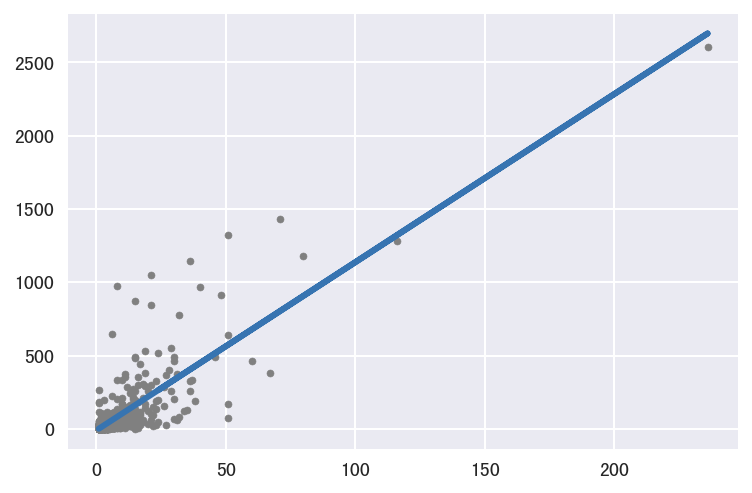

In [111]:
regr = linear_model.LinearRegression()

x = shares.reshape(-1, 1)
y = favorites.reshape(-1, 1)

regr.fit (x,y)

# Make predictions using the testing set
y_pred = regr.predict(x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y,  color='gray', marker=".")
plt.plot(x, y_pred, color='#3774B1', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

## 計算相關係數

In [115]:
import numpy as np
np.corrcoef([shares,favorites,views])

array([[ 1.        ,  0.82645792,  0.42116021],
       [ 0.82645792,  1.        ,  0.18699905],
       [ 0.42116021,  0.18699905,  1.        ]])

### 使用 heatmap 來呈現 corrcoef
* 看來 shares 和 favorites 是比較有相關的

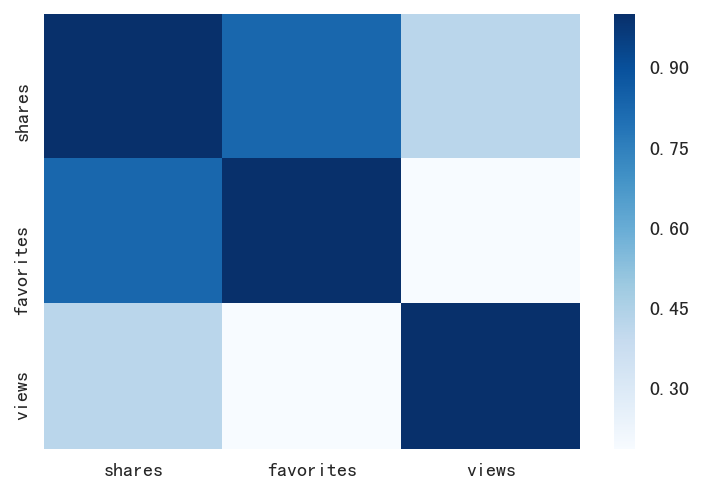

In [123]:
import matplotlib.pyplot as plt
import numpy as np



# calculate the correlation matrix
corr = np.corrcoef([shares,favorites,views])

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=['shares','favorites','views'],
        yticklabels=['shares','favorites','views'],cmap='Blues')